# Import Test

You can check that you have set up your environment correctly if you can run the cells in this notebook.

In [1]:
import pandas

In [2]:
import iris

In [3]:
import matplotlib

In [4]:
import xarray

In [5]:
import fsspec

In [6]:
import s3fs
import fsspec

In [7]:
import bokeh

In [8]:
import intake

In [2]:
cat = intake.open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/master.yaml")
list(cat)

['ocean', 'atmosphere', 'climate', 'hydro']

In [3]:
cat['atmosphere']

atmosphere:
  args:
    path: https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/atmosphere.yaml
  description: Pangeo Atmospheric Science Dataset Catalog
  driver: intake.catalog.local.YAMLFileCatalog
  metadata:
    catalog_dir: https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs


In [4]:
cat['atmosphere']['era5_hourly_reanalysis_single_levels_sa']

era5_hourly_reanalysis_single_levels_sa:
  args:
    consolidated: true
    storage_options:
      requester_pays: true
    urlpath: gs://pangeo-era5/reanalysis/spatial-analysis
  description: ERA5 hourly estimates of variables on single levels
  driver: intake_xarray.xzarr.ZarrSource
  metadata:
    catalog_dir: https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs
    tags:
    - ocean
    - model
    - atmosphere
    url: https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels


In [5]:
import xarray

In [9]:
era5_ds = xarray.open_zarr('gs://pangeo-era5/reanalysis/spatial-analysis')
era5_ds

<xarray.Dataset>
Dimensions:    (time: 350640, latitude: 721, longitude: 1440)
Coordinates:
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * time       (time) datetime64[ns] 1979-01-01 ... 2018-12-31T23:00:00
Data variables: (12/17)
    asn        (time, latitude, longitude) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    d2m        (time, latitude, longitude) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    e          (time, latitude, longitude) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    mn2t       (time, latitude, longitude) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    mx2t       (time, latitude, longitude) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    ptype      (time, latitude, longitude) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    ...         ...
    tcc        (time, latitude, longitude) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    tcrw       (time, latitude, longitude) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    tp         (time, latitude, longitude) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    tsn        (time, latitude, longitude) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    u10        (time, latitude, longitude) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    v10        (time, latitude, longitude) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2019-09-20 05:15:01 GMT by grib_to_netcdf-2.10.0: /opt/ecmw...

ERA 5 links: https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview 

In [12]:
list(era5_ds.variables)

['asn',
 'd2m',
 'e',
 'latitude',
 'longitude',
 'mn2t',
 'mx2t',
 'ptype',
 'ro',
 'sd',
 'sro',
 'ssr',
 't2m',
 'tcc',
 'tcrw',
 'time',
 'tp',
 'tsn',
 'u10',
 'v10']

In [13]:
era5_ds.t2m

<xarray.DataArray 't2m' (time: 350640, latitude: 721, longitude: 1440)>
dask.array<open_dataset-f639fb9727d2ec2d3d6ce7a4ef0de01bt2m, shape=(350640, 721, 1440), dtype=float32, chunksize=(31, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * time       (time) datetime64[ns] 1979-01-01 ... 2018-12-31T23:00:00
Attributes:
    long_name:  2 metre temperature
    units:      K

In [15]:
era5_ds.t2m.time

<xarray.DataArray 'time' (time: 350640)>
array(['1979-01-01T00:00:00.000000000', '1979-01-01T01:00:00.000000000',
       '1979-01-01T02:00:00.000000000', ..., '2018-12-31T21:00:00.000000000',
       '2018-12-31T22:00:00.000000000', '2018-12-31T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 ... 2018-12-31T23:00:00
Attributes:
    long_name:  time

In [17]:
era5_ds.t2m.loc[dict(time=slice("2014-02-01", "2014-02-02"))]

<xarray.DataArray 't2m' (time: 48, latitude: 721, longitude: 1440)>
dask.array<getitem, shape=(48, 721, 1440), dtype=float32, chunksize=(26, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * time       (time) datetime64[ns] 2014-02-01 ... 2014-02-02T23:00:00
Attributes:
    long_name:  2 metre temperature
    units:      K

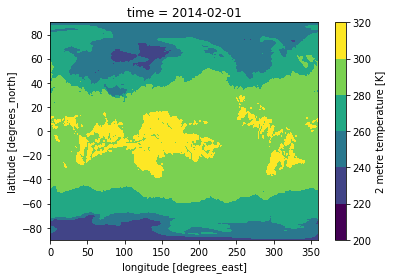

In [21]:
era5_ds.t2m.loc[dict(time=slice("2014-02-01", "2014-02-02"))][0].plot.contourf()

In [26]:
exeter_loc = {'latitude': 50.7260,
              'longitude': 3.5275}

/anaconda/envs/pangeo-lectures-env/lib/python3.8/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


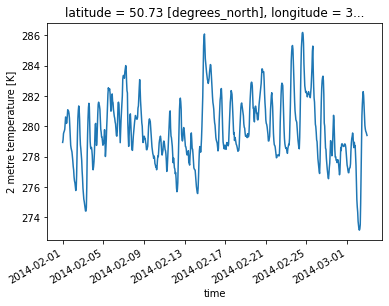

In [28]:
era5_ds.t2m.loc[dict(time=slice("2014-02-01", "2014-03-02"))].interp(**exeter_loc).plot()

Information on using the Copern

In [9]:
import cdsapi

In [11]:
c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'format': 'netcdf',
        'year': '2020',
        'month': '02',
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29',
        ],
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        'variable': [
            '10m_u_component_of_wind', '10m_v_component_of_wind', '2m_dewpoint_temperature',
            '2m_temperature', 'convective_available_potential_energy', 'sea_surface_temperature',
            'surface_pressure', 'total_precipitation',
        ],
    },
    'download.nc')

2022-04-22 15:22:19,166 INFO Welcome to the CDS
2022-04-22 15:22:19,167 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2022-04-22 15:22:19,218 INFO Request is queued
2022-04-22 15:24:13,045 INFO Request is running
2022-04-22 15:42:39,370 INFO Request is completed
2022-04-22 15:42:39,371 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data4/adaptor.mars.internal-1650641311.2649298-27189-11-2bf3a2cd-c002-4d69-950b-bb0ab5ab706f.nc to download.nc (10.8G)
2022-04-22 15:46:20,625 INFO Download rate 49.8M/s   


Result(content_length=11561854924,content_type=application/x-netcdf,location=https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data4/adaptor.mars.internal-1650641311.2649298-27189-11-2bf3a2cd-c002-4d69-950b-bb0ab5ab706f.nc)

In [2]:
import xarray

In [12]:
ds1 = xarray.open_dataset('download.nc')

In [13]:
import pathlib

In [15]:
era5_zarr_path = pathlib.Path('.').parent.absolute() / 'era5_202002_singleLevel_hourly'
era5_zarr_path.mkdir()
era5_zarr_path

PosixPath('/mnt/batch/tasks/shared/LS_root/mounts/clusters/pangeolecturestest/code/Users/stephen.haddad/PangeoLectures/era5_202002_singleLevel_hourly')

In [ ]:
ds1.to_zarr(era5_zarr_path)

In [9]:
from dask.distributed import Client

In [10]:
lient = Client()

/anaconda/envs/pangeo-lectures-env/lib/python3.8/site-packages/distributed/node.py:177: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 40635 instead
  warnings.warn(
2022-04-22 20:26:38,302 - distributed.diskutils - INFO - Found stale lock file and directory '/mnt/batch/tasks/shared/LS_root/mounts/clusters/pangeolecturestest/code/Users/stephen.haddad/PangeoLectures/dask-worker-space/worker-m_qrgu1g', purging


In [14]:
import pandas

In [15]:
pandas.read_csv('https://dscop.blob.core.windows.net/xbt/xbt-data/dask_clean/xbt_1968.csv')

HTTPError: HTTP Error 404: The specified resource does not exist.